In [155]:
#preprpcessing text
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens if token not in stop_words]
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [156]:
#loading txt
texts = []
file_paths = ['/Users/rebeccafan/Downloads/us immigration/ads_on_immigration_NBC.txt', 
              '//Users/rebeccafan/Downloads/us immigration/BIDEN_TRUMP_IMMIGRATION_POLICY_BBC.txt',
              '/Users/rebeccafan/Downloads/us immigration/Fueling_US_Economic_Growth_Bloomberg.txt',
              '/Users/rebeccafan/Downloads/us immigration/governor_migrants_FOX.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigrant_worker_protection_Baltimore_USATODAY.txt',
              '/Users/rebeccafan/Downloads/us immigration/Immigrants_Benefit_Taxpayers_Forbes.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_downsides_CNN.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_election_ABC.txt',
              '/Users/rebeccafan/Downloads/us immigration/immigration_fillip_Reuters.txt',
              '/Users/rebeccafan/Downloads/us immigration/keep_block_on_law_Washingtonpost.txt']  
for path in file_paths:
    with open(path, 'r', encoding='utf-8') as file:
        texts.append(preprocess_text(file.read()))


In [157]:
#create text matrix
from gensim import corpora

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [169]:
#topic modeling with LDA, 5 topics
from gensim.models import LdaMulticore

num_topics = 5
lda_model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Display the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.030*"biden" + 0.019*"trump" + 0.014*"immigr" + 0.013*"ad" + 0.012*"campaign"')
(1, '0.027*"immigr" + 0.013*"estim" + 0.010*"cbo" + 0.010*"budget" + 0.009*"year"')
(2, '0.018*"biden" + 0.016*"mr" + 0.014*"u" + 0.014*"border" + 0.014*"administr"')
(3, '0.028*"immigr" + 0.014*"u" + 0.013*"growth" + 0.009*"year" + 0.008*"report"')
(4, '0.021*"immigr" + 0.018*"said" + 0.013*"texa" + 0.012*"biden" + 0.012*"law"')


In [170]:
from gensim.models.coherencemodel import CoherenceModel
# Calculate Model Coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)



Coherence Score:  0.47351499925807927


In [40]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [171]:
#visual the topics
import gensim
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/Users/rebeccafan/Downloads/us immigration'+str(num_topics))

# Prepare the LDA visualization
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the data to disk
with open(LDAvis_data_filepath.replace('.html', '.pkl'), 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Load the prepared data
with open(LDAvis_data_filepath.replace('.html', '.pkl'), 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Save the visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, '/Users/rebeccafan/Downloads/us immigration'+str(num_topics)+'.html')

print("LDA visualization saved to {}".format(LDAvis_data_filepath))
LDAvis_prepared

LDA visualization saved to /Users/rebeccafan/Downloads/us immigration5


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.074126  0.099874       1        1  35.565125
1      0.139169 -0.031552       2        1  21.904404
2     -0.113919 -0.103695       3        1  19.111776
3      0.105961  0.012271       4        1  17.866785
0     -0.057084  0.023102       5        1   5.551910, topic_info=       Term        Freq       Total Category  logprob  loglift
24    biden   58.000000   58.000000  Default  30.0000  30.0000
185   trump   38.000000   38.000000  Default  29.0000  29.0000
326      mr   19.000000   19.000000  Default  28.0000  28.0000
86   immigr  119.000000  119.000000  Default  27.0000  27.0000
339   parol   17.000000   17.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
182    time    1.068921   12.212305   Topic5  -5.7325   0.4552
135   point    1.067510    8.769437   Topic5  -5.7338   0.7851
188     two    1.067285   11.355500   Topic5  -5.7340   0.5264
50   differ    1.066400   11.927618   Topic5  -5.7348   0.4765
150  releas    1.066228    8.687626   Topic5  -5.7350   0.7933

[348 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1300      1  0.908170  abbott
201       3  0.885951     abl
0         1  0.272356  accord
0         2  0.272356  accord
0         4  0.381299  accord
...     ...       ...     ...
668       2  0.259234   wrote
668       4  0.086411   wrote
669       1  0.306214    year
669       2  0.374261    year
669       4  0.306214    year

[559 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [17]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 6.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [172]:
#sentiment analysis
from textblob import TextBlob

document_names = [
    "ads_on_immigration_NBC",
    "BIDEN_TRUMP_IMMIGRATION_POLICY_BBC",
    "Fueling_US_Economic_Growth_Bloomberg",
    "governor_migrants_FOX",
    "immigrant_worker_protection_Baltimore_USATODAY",
    "Immigrants_Benefit_Taxpayers_Forbes",
    "immigration_downsides_CNN",
    "immigration_election_ABC",
    "immigration_fillip_Reuters",
    "keep_block_on_law_Washingtonpost"
]


document_sentiments = []

for text in texts:  

    text_string = ' '.join(text)
    blob = TextBlob(text_string)
    document_sentiments.append(blob.sentiment)

# Calculate average polarity and subjectivity across all documents
avg_polarity = sum([sentiment.polarity for sentiment in document_sentiments]) / len(document_sentiments)
avg_subjectivity = sum([sentiment.subjectivity for sentiment in document_sentiments]) / len(document_sentiments)

print(f"Average Polarity across all documents: {avg_polarity}")
print(f"Average Subjectivity across all documents: {avg_subjectivity}")

for name, sentiment in zip(document_names, document_sentiments):
    print(f"{name} - Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")


Average Polarity across all documents: 0.07258973173758451
Average Subjectivity across all documents: 0.33807271041237086
ads_on_immigration_NBC - Polarity: 0.19704410173160172, Subjectivity: 0.30177895021645024
BIDEN_TRUMP_IMMIGRATION_POLICY_BBC - Polarity: 0.09051529909484457, Subjectivity: 0.325741833923652
Fueling_US_Economic_Growth_Bloomberg - Polarity: 0.06984848484848485, Subjectivity: 0.30176346801346793
governor_migrants_FOX - Polarity: 0.031253529079616045, Subjectivity: 0.3511452315800141
immigrant_worker_protection_Baltimore_USATODAY - Polarity: -0.028188775510204076, Subjectivity: 0.4128826530612245
Immigrants_Benefit_Taxpayers_Forbes - Polarity: 0.037323747680890515, Subjectivity: 0.3624907235621522
immigration_downsides_CNN - Polarity: 0.0171907040328093, Subjectivity: 0.2617196400091137
immigration_election_ABC - Polarity: 0.18601048951048949, Subjectivity: 0.3720606060606059
immigration_fillip_Reuters - Polarity: 0.10267817059483729, Subjectivity: 0.35883978675645334
k

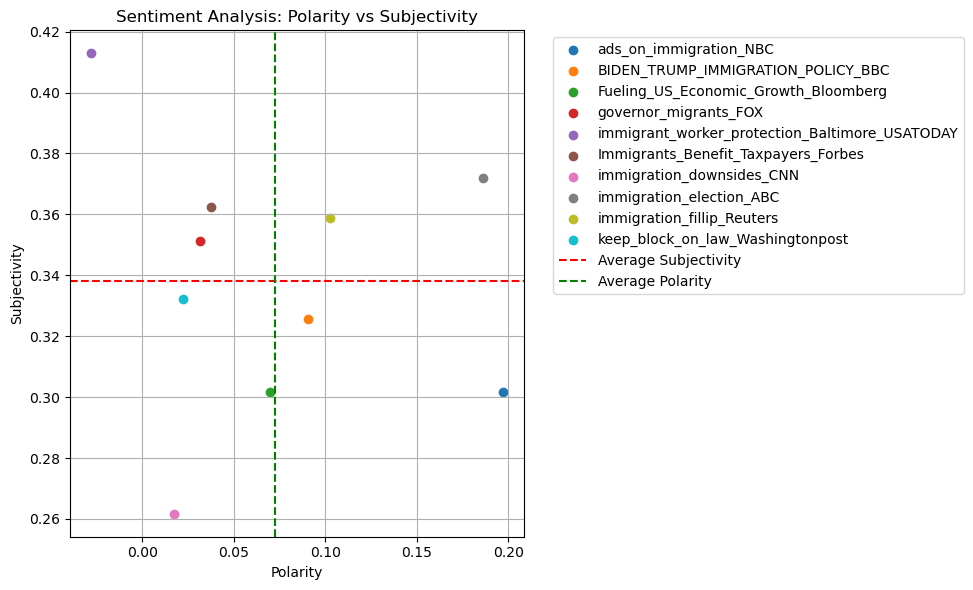

In [173]:
import matplotlib.pyplot as plt

# Extract polarity and subjectivity scores for plotting
polarities = [sentiment.polarity for sentiment in document_sentiments]
subjectivities = [sentiment.subjectivity for sentiment in document_sentiments]

# Create scatter plot
plt.figure(figsize=(10, 6))
for i, (polarity, subjectivity) in enumerate(zip(polarities, subjectivities)):
    plt.scatter(polarity, subjectivity, label=document_names[i])

# Customize the plot
plt.title('Sentiment Analysis: Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(y=avg_subjectivity, color='r', linestyle='--', label='Average Subjectivity')
plt.axvline(x=avg_polarity, color='g', linestyle='--', label='Average Polarity')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()



In [178]:
#Sentiment-Bearing Words anlaysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def identify_sentiment_words(tokens):
    sentiment_words = {'positive': [], 'negative': []}
    
    # Join tokens into a string if necessary
    text = ' '.join(tokens)  # Assuming `tokens` is a list of tokens (words)
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            word_score = sia.polarity_scores(word)['compound']
            sentence_score = sia.polarity_scores(sentence)['compound']
            
            if word_score > 0.1 and sentence_score > 0.1:
                sentiment_words['positive'].append(word)
            elif word_score < -0.1 and sentence_score < -0.1:
                sentiment_words['negative'].append(word)
    
    return sentiment_words

def identify_sentiment_words_direct(tokens):
    sentiment_words = {'positive': [], 'negative': []}
    
    for word in tokens:
        word_score = sia.polarity_scores(word)['compound']
        
        if word_score > 0.1:
            sentiment_words['positive'].append(word)
        elif word_score < -0.1:
            sentiment_words['negative'].append(word)
    
    return sentiment_words


for i, tokens in enumerate(texts):  
    sentiment_words = identify_sentiment_words(tokens) 
    print(f"Document: {document_names[i]}")
    print("Positive sentiment words:", set(sentiment_words['positive']))
    print("Negative sentiment words:", set(sentiment_words['negative']), "\n")




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rebeccafan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Document: ads_on_immigration_NBC
Positive sentiment words: set()
Negative sentiment words: {'poison', 'fault', 'rapist', 'battleground', 'crime', 'problem', 'hell', 'slam', 'critic', 'stop'} 

Document: BIDEN_TRUMP_IMMIGRATION_POLICY_BBC
Positive sentiment words: set()
Negative sentiment words: {'ban', 'stop', 'detain', 'crush', 'arrest', 'overwhelm', 'barrier', 'restrict', 'tout', 'shame', 'stall', 'threat', 'critic', 'fear', 'fire', 'lawsuit'} 

Document: Fueling_US_Economic_Growth_Bloomberg
Positive sentiment words: {'share', 'play', 'strong', 'thank', 'care', 'sure', 'gain', 'boost', 'like', 'help', 'support', 'benefit', 'legal', 'growth', 'stronger', 'expand', 'fresh'}
Negative sentiment words: set() 

Document: governor_migrants_FOX
Positive sentiment words: {'clear', 'certain', 'safe', 'highlight', 'creation', 'protect', 'join', 'urgent', 'benefit', 'stronger', 'robust', 'legal', 'allow', 'hope', 'support', 'top', 'success', 'admit', 'expand'}
Negative sentiment words: set() 

D

In [176]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


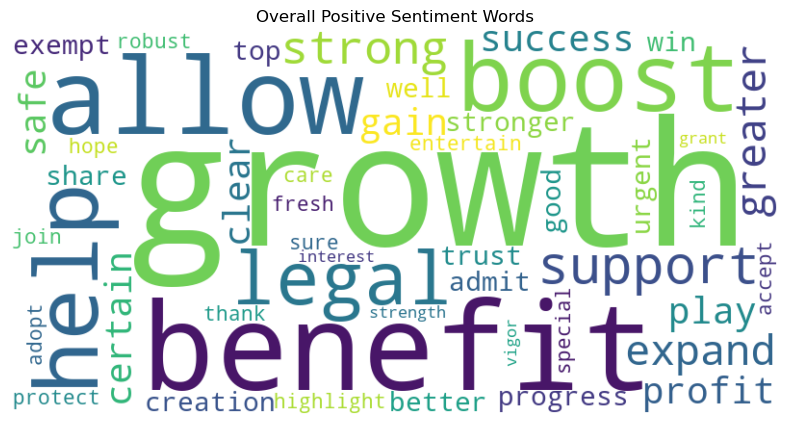

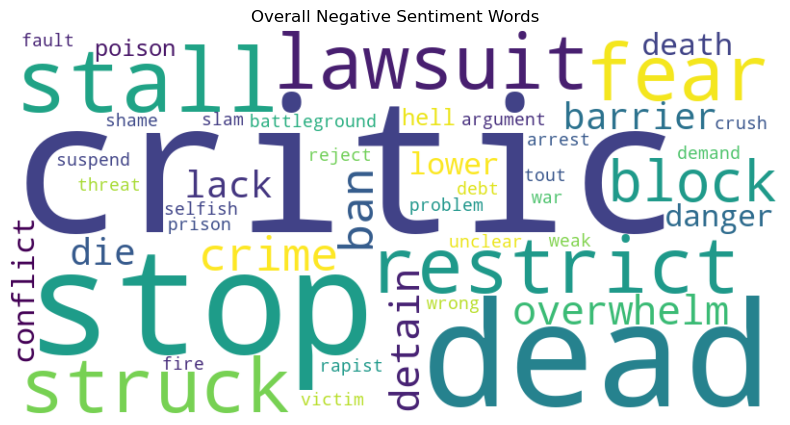

In [180]:
# word clouds for positive and negative words

all_positive_words = []
all_negative_words = []

for tokens in texts:  
    sentiment_words = identify_sentiment_words(tokens) 
    all_positive_words.extend(sentiment_words['positive'])
    all_negative_words.extend(sentiment_words['negative'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(word_list, title):
    word_cloud_text = ' '.join(word_list)
    word_cloud = WordCloud(width=800, height=400, background_color='white').generate(word_cloud_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for aggregated positive and negative words
generate_word_cloud(all_positive_words, "Overall Positive Sentiment Words")
generate_word_cloud(all_negative_words, "Overall Negative Sentiment Words")





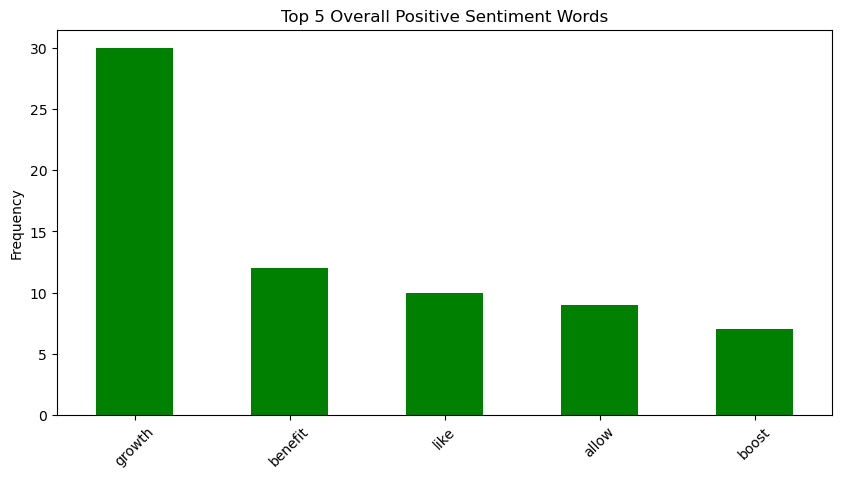

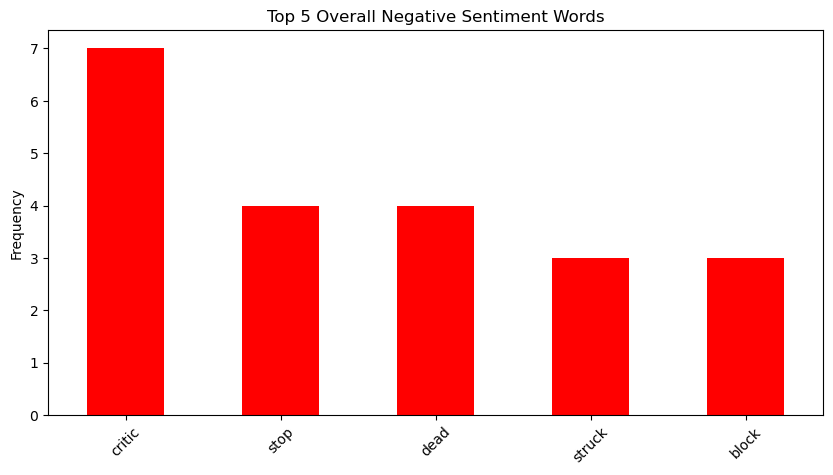

In [182]:
import pandas as pd

def generate_bar_chart_for_top_words(word_list, title, color):
    word_counts = pd.Series(word_list).value_counts().head(5)
    word_counts.plot(kind='bar', color=color, figsize=(10, 5))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Generate bar charts for top 5 aggregated positive and negative words
generate_bar_chart_for_top_words(all_positive_words, "Top 5 Overall Positive Sentiment Words", "green")
generate_bar_chart_for_top_words(all_negative_words, "Top 5 Overall Negative Sentiment Words", "red")


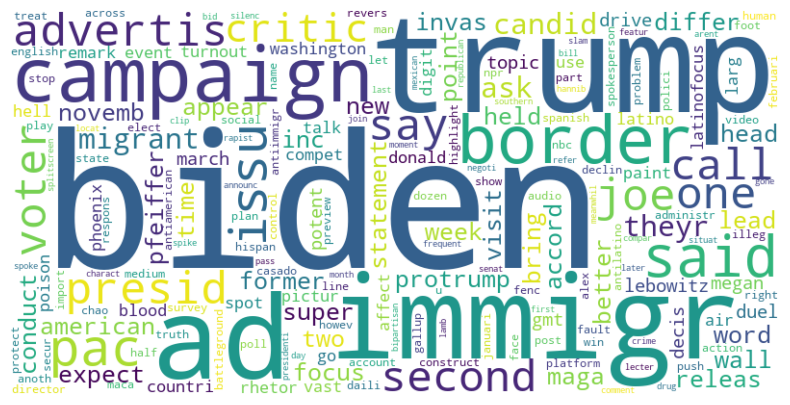

In [29]:
#visualize with worldcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the first document
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(texts[0]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
